## TANISHA SARASWAT

## The Spark Foundation Internship

## GRIP_september'21
## Data science and business analytics

## TASK 1

## Simple Linear Regression

In [63]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [64]:
data=pd.read_csv("C:\\Users\\shree\\Documents\\data sheet.csv")

In [65]:
data.head()

,Hours,scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [66]:
data.describe()

,Hours,scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [67]:
data.shape
data.nunique()

Hours     23
scores    23
dtype: int64

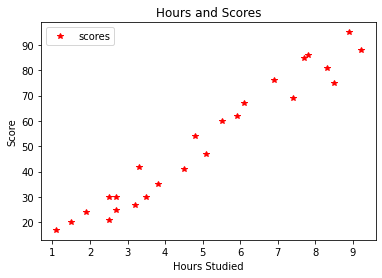

In [68]:
# Plotting the distribution of scores
data.plot(x='Hours', y='scores', style='*', color='red')  
plt.title('Hours and Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score')  
plt.show()

<AxesSubplot:>

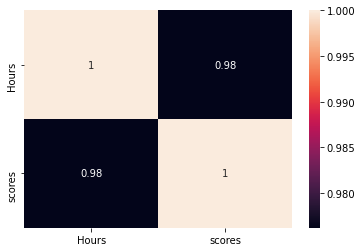

In [69]:
#Plotting correlation between feature and target
sns.heatmap(data.corr(), annot = True, linecolor='black')

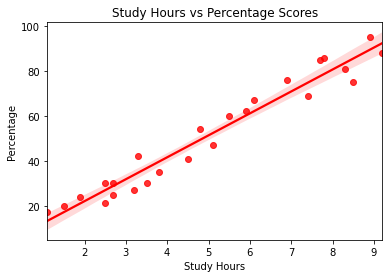

In [70]:
#Plotting regression plot to confirm above relationship between feature and target.
sns.regplot(x=data['Hours'],y=data['scores'],data=data, color='red')
plt.title('Study Hours vs Percentage Scores')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.show()

In [71]:
# dividing the data into "attributes" (inputs) and "labels" (outputs)
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values


In [72]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [73]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [75]:
#splitting the data intro train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0) 

In [76]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [77]:
print ("Coefficient -", regressor.coef_)
print ("Intercept - ", regressor.intercept_)

Coefficient - [9.91065648]
Intercept -  2.018160041434683


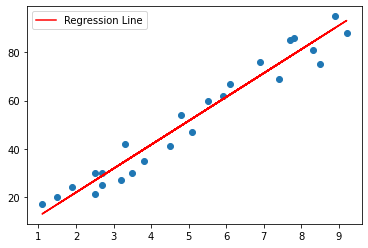

In [78]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting the test data
plt.scatter(x, y)
plt.plot(x, line,color='red', label='Regression Line')
plt.legend()
plt.show()

In [79]:
# Predicting the scores
print(x_test) 
y_pred = regressor.predict(x_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [80]:
#comparing the actual and the predicted values
SCORE = pd.DataFrame({"Actual value":y_test,"Predicted value":y_pred})
SCORE

,Actual value,Predicted value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


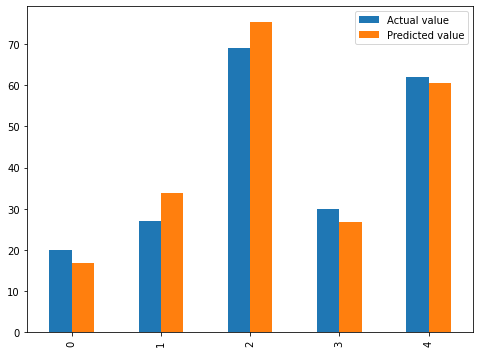

In [81]:
#plot of original and predicted values
SCORE.plot(kind='bar',figsize=(8,6))
plt.show()

In [82]:
# Testing with some new data
hours = float(input("Enter the Study Hours : "))
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Enter the Study Hours : 9.25
No of Hours = 9.25
Predicted Score = 93.69173248737538


In [83]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R^2: 0.9454906892105356
